Describe the steps required for performing PCA. How SVD can be used within this process?

The Principal Component Analysis is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation, by means of linear combinations of vectors that are directed in the directions where variance is maximized, in descending order: this means that the vector related to the first principal component is the direction of maximum variance in the dataset, the vector related to the second principal component is the second direction where variance is maximized, and so on.

Here are the steps required to perform PCA:
- Center (or standardize) the data: move to a dataset where each feature has zero mean (and unit variance if standardized);
- Compute the covariance matrix of the centered (standardized) data: $$ C = \frac{A^TA}{n-1}$$ with $n$ number of samples;
- Find eigenvectors and eigenvalues of the covariance matrix: $C$ is symmetric, so it can be diagonalized $$C = WLW^T$$ Eigenvectors are in matrix $W$ and represent the principal components (direction of maximum variance), and the eigenvalues are in the diagonal matrix $L$ and indicate the amount of variance explained by each principal component (the magnitude of the variance). 

    Eigenvectors are all orthogonal to each other, and the corresponding eigenvalues are sorted in descending order;
- Project the data onto the new feature space: principal components for the data are given by $AV$. 

    The new features will be a linear combination of the original features. The projection matrix is obtained by stacking the eigenvectores corresponding to the selected principal components (i.e., the ones that together explain the majority of the variance in the dataset). The new dataset is obtained by multiplying the standardized data by the projection matrix.

The SVD can be used in this process by modifying a little bit the steps:
- Instead of computing the covariance matrix of the centered (standardized) data, apply the SVD decomposition on it: $$A = U\Sigma V^T$$
 Matrix $U$ contains the left singular vectors, matrix $V^T$ contains the right singular vectors, while matrix $\Sigma$ is diagonal and contains the singular values.
 We can easily see that $$C = \frac{V\Sigma U^TU\Sigma V^T}{n-1} = V\frac{\Sigma ^2}{n-1}V^T$$ so right singular vectors $V$ are principal components and singular values are related to eigenvalues of the covariance matrix by $\lambda _i = \frac{\sigma _i ^2}{n-1} $ .
- Principal components are then obtained by multiplying $AV = U\Sigma V^TV = U\Sigma$

Suppose you perform PCA on a 2D dataset and it yields 2 eigenvalues which are equal. 
What does it mean concerning the importance of the dimension?
Would pursuing a dimensionality reduction be a good choice? Why?

The eigenvalues obtained from the covariance matrix represent the amount of variance explained by each principal component: if the two eigenvalues obtained are the same, it means that both dimensions carry an equal amount of importance (or both contribute equally to the variability in the data).

This result suggest that there is no dominan direction or axis along which data is spread: data is equally spread out in both dimentions.

Practically, this means that reducing the dimensionality of the dataset by dropping one of the dimensions would not result in significant loss of information since both contribute equally, but this of course depend by the dataset under study.

Draw a dataset with two eigenvalues of the same size.

(100,)
(500,)
(500, 2)
[12.84523258 12.84523258]


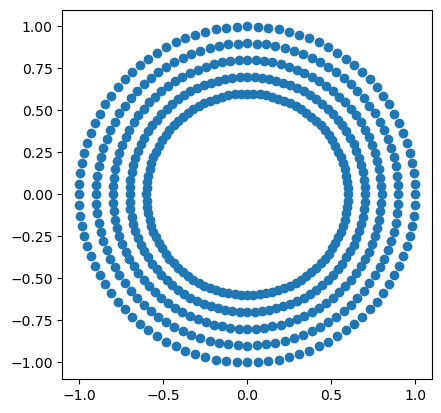

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sampling = np.arange(0, 2 * np.pi, np.pi / 50)
print(sampling.shape)


X = np.cos(sampling)
Y = np.sin(sampling)
for i in range(4):
    X = np.concatenate([X, np.cos(sampling) * (1 - (i + 1) / 10)])
    Y = np.concatenate([Y, np.sin(sampling) * (1 - (i + 1) / 10)])
print(X.shape)


A = np.column_stack([X, Y])
print(A.shape)

_, s, _ = np.linalg.svd(A)
print(s)

plt.scatter(X, Y)
plt.gca().set_aspect("equal")

Suppose now you have performed a PCA on a 2D dataset and you get the eigenvalues 6 and 2. Draw a distribution of sample points that may give rise to this results. Also draw the eigenvectors.

[6.05020055 1.96788609]
[2.45971554 1.40281363]


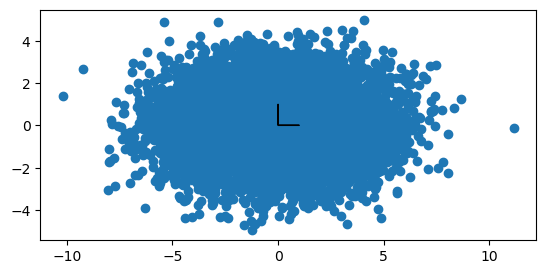

In [2]:
# np.random.seed(0)
n_samples = 10000
X = np.random.normal(loc=0.0, scale=np.sqrt(6), size=(n_samples))
Y = np.random.normal(loc=0.0, scale=np.sqrt(2), size=(n_samples))

A = np.column_stack([X, Y])

print(np.linalg.eigvals((A.T @ A) / n_samples))
_, s, _ = np.linalg.svd(A, full_matrices=False)
print(s / np.sqrt(n_samples))

plt.scatter(X, Y)
plt.arrow(0, 0, 1, 0)
plt.arrow(0, 0, 0, 1)
plt.gca().set_aspect("equal")

[[4.94117647 1.76470588]
 [1.76470588 3.05882353]]
(100000, 2)
[[5.56214818 1.2426036 ]
 [1.2426036  2.41793871]]


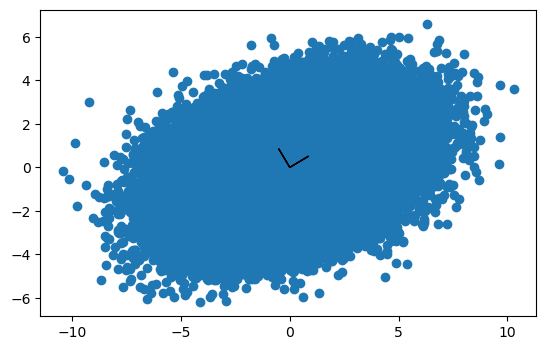

In [3]:
n_samples = 100000
eigv1 = np.array([15, 9])
eigv2 = np.array([-9, 15])

eigv1 = eigv1 / np.linalg.norm(eigv1)
eigv2 = eigv2 / np.linalg.norm(eigv2)

S = np.diag([6, 2])
W = np.column_stack([eigv1, eigv2])
C = W @ S @ W.T
print(C)

np.random.seed(0)
A = np.linalg.cholesky(C)
sampling_points = np.random.randn(n_samples, 2)
X = sampling_points @ A
print(X.shape)

cov = np.cov(X.T)
print(cov)

plt.scatter(X[:, 0], X[:, 1])
plt.arrow(0, 0, eigv1[0], eigv1[1])
plt.arrow(0, 0, eigv2[0], eigv2[1])
plt.gca().set_aspect("equal")

[774.20577646 445.66759347]
(100000, 2)


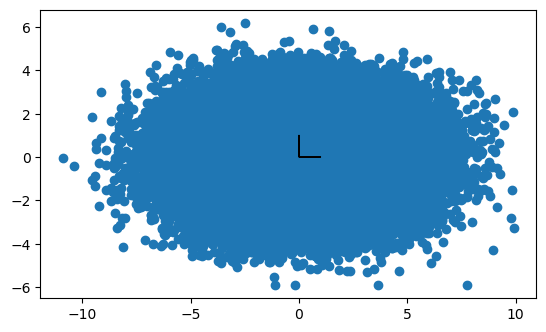

In [4]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
print(s)
PHI = U @ np.diag(s)

print(PHI.shape)
plt.scatter(PHI[:, 0], PHI[:, 1])
plt.arrow(0, 0, 1, 0)
plt.arrow(0, 0, 0, 1)
plt.gca().set_aspect("equal")

In [5]:
print("Eigenvalues obtained after having performed the PCA on the data:")
print(np.linalg.eigvals(X.T @ X) / (n_samples - 1))
print("Which is basically the couple (6, 2) that we wanted")

Eigenvalues obtained after having performed the PCA on the data:
[5.99400578 1.9862159 ]
Which is basically the couple (6, 2) that we wanted


Consider the following 3 data points in the 2D space: (−1,1),(0,0) and (1,1). What’s the first principal component of the given dataset ?

Centered data
[[-1.          0.33333333]
 [ 0.         -0.66666667]
 [ 1.          0.33333333]]
Covariance matrix
[[0.66666667 0.        ]
 [0.         0.22222222]]


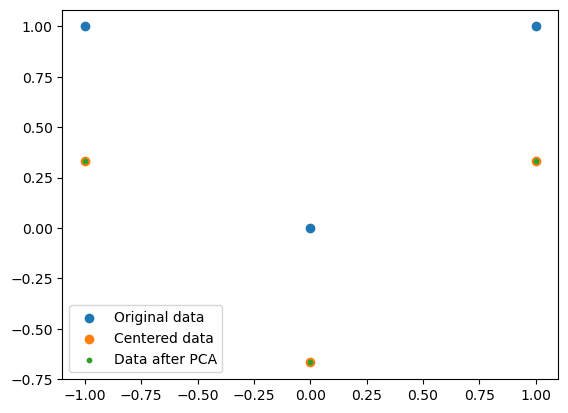

In [6]:
p1 = np.array([-1, 1])
p2 = np.array([0, 0])
p3 = np.array([1, 1])

data = np.row_stack([p1, p2, p3])

plt.scatter(data[:, 0], data[:, 1], label="Original data")

# Centralize data
data_mean = np.mean(data, axis=0)
data = data - data_mean[np.newaxis, :]
print("Centered data")
print(data)
# covariance matrix
c = data.T @ data / 3
print("Covariance matrix")
print(c)

plt.scatter(data[:, 0], data[:, 1], label="Centered data")

# Apply SVD to the centralized data
U, s, VT = np.linalg.svd(data, full_matrices=False)

PHI = U @ np.diag(s)

plt.scatter(PHI[:, 0], PHI[:, 1], s=10, label="Data after PCA")
plt.legend()

If you project the original data points onto the 1D subspace spanned by the principal component, what are their coordinates in this subspace? What is the variance of the projected data?

In [7]:
# Project original data onto the 1D subspace
proj = data @ VT[:, 0]
print("Coordinates of the points in the subspace spanned by the principal component")
print(proj)
print("Variance of the projected data")
print(np.var(proj))

Coordinates of the points in the subspace spanned by the principal component
[-1.  0.  1.]
Variance of the projected data
0.6666666666666666


In [18]:
proj = U @ np.diag(s)
proj = proj[:, 0]
proj

array([-1.,  0.,  1.])

If you represent the projected data in the original 2D space and consider them as the reconstruction of the original data points, what is the reconstruction error? Compute the reconstruction of the points.

The reconstruction error is: 0.82


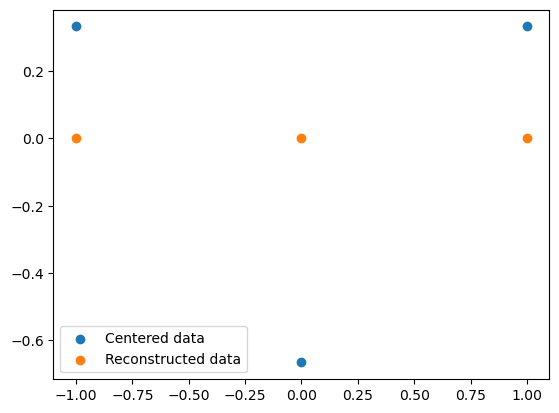

In [8]:
plt.scatter(data[:, 0], data[:, 1], label="Centered data")
reconstructed_data = np.column_stack([proj, np.zeros(proj.shape)])
plt.scatter(
    reconstructed_data[:, 0], reconstructed_data[:, 1], label="Reconstructed data"
)
plt.legend()

reconsutruction_error = np.linalg.norm(reconstructed_data - data)
print("The reconstruction error is: %1.2f" % reconsutruction_error)